 # Homework 1

This Homework deals with Getting Data into Python, Cleaning it up and visualizing in such a way that it tells a story and helps the user see through the process of cleaning and showing results. As a goal of this project is to talk about topics that I am interested in and that I can tell a story about and make an Impact.

### Part 1 - SQL Dataset
This Data comes from (link), and has a robust amount of data on European Football (AKA soccer). The purpose of this Dataset is to help the user view the realtinship within players and teams to find the "secret sauce" and the ideal balance between the different variables within teams and players. 

The first import commands allows us to import the libraries needed for this assignment. Note that since this database is in SQL langugage, we will use the SQLITE3 in order to use sql commands into python. This library is useful for making changes and keeping up with the necessary moving parts of the database. SQL is a command mainly used for database mangagement. The Database that I will use for this assignment is the European soccer databse found on Kaggle (https://www.kaggle.com/hugomathien/soccer/data). This Database contains information on both team and players. For the purpose of this assignment I will focus on the personal data for each player. Especially the "overall ranking" which will be the measure used to compare plaayers overall performance.

In [1]:
import pandas as pd
import numpy as np
import sqlite3 as sql
from matplotlib import pyplot as plt
from matplotlib import style
%matplotlib inline
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
import pandas_datareader.data as web
from matplotlib.finance import candlestick_ohlc
#from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates
style.use('ggplot')

/Users/J.Alvarez/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The finance module has been deprecated in mpl 2.0 and will be removed in mpl 2.2. Please use the module mpl_finance instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Working with a SQL database some commands are unique from the SQLITE3 Library
connect = Allows you to create a connection and make changes and call tables from a SQL database
cursos  = Allows you to run SQL commands on python and serves as translator python-sql
commit = Commits the current transaction. If you don’t call this method, anything you did since the last call to                commit() is not visible from other database connections.
close = Closes the connection with the database

In [ ]:
db = sql.connect('/Users/J.Alvarez/Downloads/soccer_database.sqlite')
cur = db.cursor()
cur.execute("SELECT * FROM player_attributes;")
df = pd.read_sql_query("SELECT * from player_attributes", db)

#### <center> Cleaning the data
Data cleaning is essential in order to have accurate and relevant information. In this case, I want to research what are the most important attributes for a player to be well rounded. 
1. I am only focusing in the top players, therefore I will remain with 71 observations only. This might be a low number, however this might allow me to cluster on a specific profile of player with certain characteristics and that are very similar in various levels and have top quality. 

2. 


In [ ]:
df = pd.read_sql_query("SELECT * from player_attributes", db)
df = df.drop('gk_diving', 1)
df = df.drop('gk_handling', 1)
df = df.drop('gk_kicking', 1)
df = df.drop('gk_positioning', 1)
df = df.drop('gk_reflexes', 1)
df = df.drop('attacking_work_rate', 1)
df = df.drop('defensive_work_rate', 1)
df = df.drop('potential', 1)
df = df.drop('free_kick_accuracy', 1)
df = df.drop('shot_power', 1)
df = df.drop('finishing', 1)
df = df.drop('curve', 1)
df = df.drop('interceptions', 1)
df = df.drop('penalties', 1)
df = df.drop('vision', 1)
df = df.drop('volleys', 1)
#df = df.drop('preferred_foot', 1)
list(df)

In [ ]:
cur.execute("SELECT * FROM player_attributes;")
cur.execute('DELETE FROM player_attributes WHERE balance < 60')
cur.execute('DELETE FROM player_attributes WHERE overall_rating < 70')
cur.execute('DELETE FROM player_attributes WHERE sliding_tackle < 60')
cur.execute('DELETE FROM player_attributes WHERE agility < 60')
cur.execute('DELETE FROM player_attributes WHERE short_passing < 60')
cur.execute('DELETE FROM player_attributes WHERE free_kick_accuracy < 60')
cur.execute('DELETE FROM player_attributes WHERE acceleration < 60')
cur.execute('DELETE FROM player_attributes WHERE crossing < 60')
db.commit()
db = sql.connect('/Users/J.Alvarez/Downloads/soccer_database.sqlite')
cur = db.cursor()

In [ ]:
print('Overall Rating Mean') 
print(df["overall_rating"].mean())
print('Dribbling Mean') 
print(df["dribbling"].mean())
print('Ball Control Mean') 
print(df["ball_control"].mean())
df.count()

In [ ]:
df.describe()

In [ ]:
df.info()

In [ ]:
df.head()

#### <center> Graphing relationships

1. The first intersting relationship is whether players who are riht footed are "better" or at least more highly ranked than those with the left foot or viceversa. Here we see that they are very simliar and that while there is over double players who'd rather play with the right, there is only a difference of "1".

2. The second relatinship I am looking into doing, is to see how some of the variables correlate to the overall ranking and what their importance is. Trying to find those that have the least variance and strongest correlations. There are different ways I could get this done. One of them, and probably the most straightforward is running a multiple linear regression, however I will be plotting those relationships and comparing the results accross the graphs.
    
    The most 

In [ ]:
df['preferred_foot'].value_counts()

In [ ]:
df.groupby(['preferred_foot'])['overall_rating'].mean().round(2)

In [ ]:
player_a = pd.read_sql_query("SELECT * from player_attributes", db)

In [ ]:
player_a.plot(kind = "scatter", x = "overall_rating", y = "short_passing")

In [ ]:
player_a.plot(kind = "scatter", x = "overall_rating", y = "stamina")

In [ ]:
player_a.plot(kind = "scatter", x = "overall_rating", y = "dribbling")

In [ ]:
player_a.plot(kind = "scatter", x = "overall_rating", y = "ball_control")

In [ ]:
player_a.plot(kind = "scatter", x = "overall_rating", y = "agility")

In [ ]:
player_a.plot(kind = "scatter", x = "overall_rating", y = "aggression")

In [ ]:
sns.lmplot(x="dribbling", y="overall_rating", data=df)

In [ ]:
sns.lmplot(x="ball_control", y="overall_rating", data=df)

#### <center> Takeaways

The most interesting relationship(s) are ball control and dribbling. This is not too suprising, since most agile and best "seen" players are those who are good playing with the ball and dribbling players. While most of these variables are somewhat subject, it is assumed that the subjectivity is constant across all players.

What I have learned from this assignment is that there are countless of ways in which a player can be asses, and the best rated players are those who are best "seen" by the public, regardless if there are other compenents and skills that are less noticeable. A player's ranking is almost guaranteed to go up, if they increase their dribbling and ball control abilities, but not their stamina, agression or short passing.

### <center> Part 2 - Web Data

For the Second data source, I have chosen to grab data from the web using the native pandas Web.DataReader. This is super helpful to grab data from sources that are standard and you know the webpage well to know what you are grabbing. In this case I am getting Stock Data from a single company, YELP. I am interested in looking at YELP since one of the main board members, "Max Levchin" (Co funder of PayPal), decided to resign of his positiion in order to concentrate in his newly found firm "Affirm". This decision took a hit to the compamy who was previously looking for a buyer and this is noticeable in the drop of prices and the volume of the transaction that took place around the time when he was leaving.

Much of this work I was able to get done thanks to youtuber "sentdex", so shoutout to him and his financial python series. (https://www.youtube.com/user/sentdex)



#### <center> Data Gathering & Cleaning

As explained earlier, this data is directly retrived from the web and it gathered Data from the Yelp stock. Regardless of how back the start date goes, it will get data from its original IPO (march 02 2012). Once the data is gathered it is saved locally into a .CSV for simplicity and use with pandas with the .to_csv command.

As part of the Data cleaning process, I created a new colum in the existing DataFrame with a 100 day moving average in order to show a smoother look to the changes in prices of the stocks as time went by. 

I also created a new dataframe with the OHLC (OPEN HIGH LOW CLOSE) a 10 day resampling. So rather than a moving average this is a simple average of 10 days to make the data more workable and not to have so much of the same information over and over again for the Adjusted close price varaible. I added up the total # of transactions (Volume of trade) for the same time period as well.

In [ ]:
start = dt.datetime(2011,1,1)
end = dt.datetime(2017,12,31)
df = web.DataReader('YELP', 'yahoo', start, end)
df.to_csv('yelp.csv')
df = pd.read_csv('yelp.csv', parse_dates = True, index_col=0 )

In [ ]:
print(df.head())

In [ ]:
#- QUESTION: thinking in throwing this out.
df.plot()

In [ ]:
#QUESTION- THINKING OF THROWING THIS OUT..not super relevant and kindaunorganizd..
df.plot(kind = "line", x = "Open", y = "Close")

In [ ]:
df['Adj Close'].plot()

In [ ]:
df['100ma'] = df['Adj Close'].rolling(window=100, min_periods = 0).mean()
df.dropna(inplace=True)

In [ ]:
df_ohlc = df['Adj Close'].resample('10D').ohlc()
df_volume = df['Volume'].resample('10D').sum()
df_ohlc.reset_index(inplace=True)
df_ohlc['Date'] = df_ohlc['Date'].map(mdates.date2num)

In [ ]:
print(df.head())

In [ ]:
print(df_ohlc.head())

In [ ]:
print(df_volume.head())

#### <center> Graphing the Data
For the plots in this case all I will do is plot the previously made dataframe to show the prices changes over time and point out that it was around the end of 2014 that the announcement came out that Max Levchin would leave the company and resign in the board. There are 2 main Graphs I will include in this sectin of the homework.

1. Moving average Graph. 
As explained earlier this is a way to show a smoother realtionship over time and shows how the stock is performing agains the average of the prviosus 100 days. Through the syntax of 'min_days=0' it allows the data to keep the first 100 days when there is no prior data to take an average of.

2. Candlestick Graph
The Candlestick Graph is a super cool graph used in finance to show alot of information in a single graph. Since I am graphing over several years, most of the uselfulness of this graph will not yield much relevance. I will point out though that the green parts of the graphs are anytime the closing price ended up higher than th start and red the opposite. This relationship jumps to the eye, especially when there are period where stocks are seemoingly stagnant.

In [ ]:
##plotting with matplotlib in a 6X2 table 
##each figure has its own subplots or axis, 

In [ ]:
ax1 = plt.subplot2grid((6,1), (0,0), rowspan = 5, colspan = 1)
ax1.plot(df.index, df['Adj Close'])
ax1.plot(df.index, df['100ma'])
ax1.xaxis_date()
ax2 = plt.subplot2grid((6,1), (5,0), rowspan = 1, colspan = 1)
ax2.bar(df.index, df['Volume'])


In [ ]:
ax1 = plt.subplot2grid((6,1), (0,0), rowspan = 5, colspan = 1)
candlestick_ohlc(ax1, df_ohlc.values, width=2,colorup='g')
ax2 = plt.subplot2grid((6,1), (5,0), rowspan = 1, colspan = 1)
ax2.fill_between(df_volume.index.map(mdates.date2num), df_volume.values, 0)
ax2.xaxis_date()

#### <center> Takeaways

What I'd like to point out in this scenario is that in the finance world, the price of stocks are heavily determined by people's expectations and behavior toward the future and the possible changes to a specific stock price. It is interesting to see this relationship played such a big role in the previous fall of the YELP stock. While there are countless of other factors that play a role in why a company's stock plummets, there is no doubt that people's expectations and reactions to the recent news plays a major role.

### <center> Part 3 - CSV

#### <center>Flight Information Data
For this part of the homework I decided to work with a more commonly known data type (.csv).

#### <center> Data Gathering & Cleaning
The Data retrived is from all the domestic flights during 2015 in the US. Since this is a very large dataset, I decided to look over it and see the largest airlines and concentrate in the 5 airlines with the most flights (and consequently the most delays). The reason why I decided to take this route was because those airlines are the most frequently flown and I want to gain insight into why are their flights delayed and what is a reasonable delay in a flight and which of the "major" airlines is (on average) most trusted to have a flight on time. It also makes the dataset significantly smaller and more manageable.

As part of the data cleaning, I decided to drop some variables that wont be relevant to the discussion or the findings of this study. Afterwards, in order to get a better idea of the data and what kind of delays I was working with, I added a filter to only keep those flights whose arrival delay was greater than 15 mins. This will drastically reduce the dataset and include onlyu those flights whose delays are significant.


In [2]:
flights_df = pd.read_csv("/Users/J.Alvarez/Downloads/flight_data/flights.csv", low_memory=True)

/Users/J.Alvarez/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
flights_df = flights_df.drop('CANCELLATION_REASON', 1)
flights_df = flights_df.drop('CANCELLED', 1)
flights_df = flights_df.drop('DIVERTED', 1)
flights_df = flights_df.drop('WHEELS_ON', 1)
flights_df = flights_df.drop('TAXI_IN', 1)
flights_df = flights_df.drop('TAIL_NUMBER', 1)
flights_df = flights_df.drop('SCHEDULED_DEPARTURE', 1)
flights_df = flights_df.drop('SCHEDULED_ARRIVAL', 1)
flights_df = flights_df.drop('FLIGHT_NUMBER', 1)

In [4]:
flights_df = flights_df[flights_df.ARRIVAL_DELAY > 15]

#### <center> Describing Data

For this part, I created a table showing the total hour of delay across all airlines. Afterwards I broke it down between what the different types of delayed that could happen. Afterwards, I decided to look a the mean delay for each day (bear in mind that this includes only delays that have been 15 or more mins). It came out to be a very similar to each other with the mean around 60 mins. Monday came out to be the day that had the longest delays on average (no surprises.. mondays..) 
Then to keep exploring the data, I took the total minutes of delays for each airlines and then took the top 5 with the most flights/delays and then trimmed the dataframe to only include those airlines. Note that I changed the index, diggin thorugh the internet this seemed to be the most efficient way to trim a dataset.

At this point most airlines are pretty similar with the exception of NW (Southwest) which is almost double as everybody else. Then the previous step was repeated where the mean was found for each airiline. Surprisingly, NW came out with the lowest mean, meaning that they could have had a couple of outliers that sweeked the data or they simly fly double the number of flihgts than everybody else.

We see that the latter was the case since they almost double everybody in number of flights (bear in mind that these are flights that have 15 or mins of delays) so they dont necessarily fly more, they just fly with the most delays.
To finish this process, I ran the 'flights_df.info' command to get an idea of the data and looked at the count of observations to make sure that there were enough information to draw inferences. 

PS: I wanted to run another analysis but ended up not working out for me, and for that I came across this formula: "flights_df.append(flights_df.sum(numeric_only=True), ignore_index=True)" that appended a total at the bottom, of each column, I kept it as part of the homework for personal further reference.

ALSO: I read up online a much easier way to create the "new" DataFrame instead of having to do it manually (or at least each one of the means with the following formula: "means = flights_df.mean(axis = 0)". Sadly it never worked! :(

In [5]:
flights_df.count()

YEAR                   1023498
MONTH                  1023498
DAY                    1023498
DAY_OF_WEEK            1023498
AIRLINE                1023498
ORIGIN_AIRPORT         1023498
DESTINATION_AIRPORT    1023498
DEPARTURE_TIME         1023498
DEPARTURE_DELAY        1023498
TAXI_OUT               1023498
WHEELS_OFF             1023498
SCHEDULED_TIME         1023498
ELAPSED_TIME           1023498
AIR_TIME               1023498
DISTANCE               1023498
ARRIVAL_TIME           1023498
ARRIVAL_DELAY          1023498
AIR_SYSTEM_DELAY       1023498
SECURITY_DELAY         1023498
AIRLINE_DELAY          1023498
LATE_AIRCRAFT_DELAY    1023498
WEATHER_DELAY          1023498
dtype: int64

In [65]:

A0 = flights_df["ARRIVAL_DELAY"].sum()
A1 = (flights_df["AIRLINE_DELAY"].sum())
B1 = ((flights_df["AIRLINE_DELAY"].sum()/60)/(flights_df["ARRIVAL_DELAY"].sum()/60))
A2 = (flights_df["LATE_AIRCRAFT_DELAY"].sum())
B2 = ((flights_df["LATE_AIRCRAFT_DELAY"].sum()/60)/(flights_df["ARRIVAL_DELAY"].sum()/60))
A3 = (flights_df["WEATHER_DELAY"].sum())
B3 = ((flights_df["WEATHER_DELAY"].sum()/60)/(flights_df["ARRIVAL_DELAY"].sum()/60))
A4 = (flights_df["SECURITY_DELAY"].sum())
B4 = ((flights_df["SECURITY_DELAY"].sum()/60)/(flights_df["ARRIVAL_DELAY"].sum()/60))
A5 = (flights_df["AIR_SYSTEM_DELAY"].sum())
B5 = ((flights_df["AIR_SYSTEM_DELAY"].sum()/60)/(flights_df["ARRIVAL_DELAY"].sum()/60))

summary_df = pd.DataFrame(data=[B1,B2,B3,B4,B5], index=['AIRLINE', 'LATE AIRCRAFT', 'WEATHER', 'SECURITY', 'AIR SYSTEM'], 
                          columns=['Delayed_Percent'])

print(summary_df)

               Delayed_Percent
AIRLINE               0.338103
LATE AIRCRAFT         0.406652
WEATHER               0.051747
SECURITY              0.000806
AIR SYSTEM            0.202693


In [66]:
flights_df.groupby(['DAY_OF_WEEK'])['ARRIVAL_DELAY'].mean().round(2)

DAY_OF_WEEK
1    64.22
2    61.42
3    59.02
4    59.57
5    58.05
6    61.02
7    60.19
Name: ARRIVAL_DELAY, dtype: float64

In [72]:
flights_df.groupby(['AIRLINE'])['ARRIVAL_DELAY'].sum()/60

AIRLINE
AA    129263.666667
DL    119270.433333
EV    113206.016667
UA    112075.350000
WN    203862.483333
Name: ARRIVAL_DELAY, dtype: float64

In [56]:
flights_df = flights_df.set_index(['AIRLINE'])
flights_df = flights_df.loc[flights_df.index.isin(['AA','WN','UA','EV','DL'])]

In [57]:
flights_df.groupby(['AIRLINE'])['ARRIVAL_DELAY'].sum()/60

AIRLINE
AA    129263.666667
DL    119270.433333
EV    113206.016667
UA    112075.350000
WN    203862.483333
Name: ARRIVAL_DELAY, dtype: float64

In [58]:
flights_df.groupby(['AIRLINE'])['ARRIVAL_DELAY'].mean()/60

AIRLINE
AA    1.032144
DL    1.054445
EV    1.074764
UA    1.106338
WN    0.896820
Name: ARRIVAL_DELAY, dtype: float64

In [59]:
flights_df.index.value_counts()

WN    227317
AA    125238
DL    113112
EV    105331
UA    101303
Name: AIRLINE, dtype: int64

In [60]:
flights_df.info

<bound method DataFrame.info of          YEAR  MONTH  DAY  DAY_OF_WEEK ORIGIN_AIRPORT DESTINATION_AIRPORT  \
AIRLINE                                                                     
AA       2015      1    1            4            DFW                 MIA   
AA       2015      1    1            4            IAH                 MIA   
AA       2015      1    1            4            DEN                 DFW   
UA       2015      1    1            4            SFO                 DEN   
UA       2015      1    1            4            SMF                 DEN   
DL       2015      1    1            4            PHX                 DTW   
AA       2015      1    1            4            JFK                 MIA   
UA       2015      1    1            4            CLE                 IAH   
AA       2015      1    1            4            SEA                 DFW   
EV       2015      1    1            4            BUF                 EWR   
UA       2015      1    1            4      

In [61]:
flights_df.count()

YEAR                   672301
MONTH                  672301
DAY                    672301
DAY_OF_WEEK            672301
ORIGIN_AIRPORT         672301
DESTINATION_AIRPORT    672301
DEPARTURE_TIME         672301
DEPARTURE_DELAY        672301
TAXI_OUT               672301
WHEELS_OFF             672301
SCHEDULED_TIME         672301
ELAPSED_TIME           672301
AIR_TIME               672301
DISTANCE               672301
ARRIVAL_TIME           672301
ARRIVAL_DELAY          672301
AIR_SYSTEM_DELAY       672301
SECURITY_DELAY         672301
AIRLINE_DELAY          672301
LATE_AIRCRAFT_DELAY    672301
WEATHER_DELAY          672301
dtype: int64

In [62]:
flights_df['ARRIVAL_DELAY'].sum()

40660677.0

In [63]:
flights_df.append(flights_df.sum(numeric_only=True), ignore_index=True)

,YEAR,MONTH,DAY,DAY_OF_WEEK,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,...,ELAPSED_TIME,AIR_TIME,DISTANCE,ARRIVAL_TIME,ARRIVAL_DELAY,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2.015000e+03,1.0,1.0,4.0,DFW,MIA,7.030000e+02,108.0,15.0,7.180000e+02,...,155.0,133.0,1121.0,1.038000e+03,102.0,0.0,0.0,0.0,0.0,102.0
1,2.015000e+03,1.0,1.0,4.0,IAH,MIA,6.180000e+02,58.0,19.0,6.370000e+02,...,137.0,111.0,964.0,9.350000e+02,54.0,0.0,0.0,54.0,0.0,0.0
2,2.015000e+03,1.0,1.0,4.0,DEN,DFW,6.230000e+02,53.0,32.0,6.550000e+02,...,138.0,96.0,641.0,9.410000e+02,66.0,13.0,0.0,53.0,0.0,0.0
3,2.015000e+03,1.0,1.0,4.0,SFO,DEN,5.500000e+02,19.0,15.0,6.050000e+02,...,153.0,127.0,967.0,9.230000e+02,26.0,7.0,0.0,19.0,0.0,0.0
4,2.015000e+03,1.0,1.0,4.0,SMF,DEN,6.340000e+02,56.0,26.0,7.000000e+02,...,164.0,129.0,909.0,1.018000e+03,78.0,22.0,0.0,56.0,0.0,0.0
5,2.015000e+03,1.0,1.0,4.0,PHX,DTW,8.080000e+02,148.0,19.0,8.270000e+02,...,203.0,178.0,1671.0,1.331000e+03,128.0,0.0,0.0,0.0,0.0,128.0
6,2.015000e+03,1.0,1.0,4.0,JFK,MIA,6.400000e+02,55.0,17.0,6.570000e+02,...,199.0,152.0,1089.0,9.590000e+02,69.0,14.0,0.0,55.0,0.0,0.0
7,2.015000e+03,1.0,1.0,4.0,CLE,IAH,6.290000e+02,39.0,11.0,6.400000e+02,...,198.0,170.0,1091.0,8.470000e+02,43.0,4.0,0.0,39.0,0.0,0.0
8,2.015000e+03,1.0,1.0,4.0,SEA,DFW,5.550000e+02,0.0,24.0,6.190000e+02,...,251.0,216.0,1660.0,1.206000e+03,16.0,16.0,0.0,0.0,0.0,0.0
9,2.015000e+03,1.0,1.0,4.0,BUF,EWR,9.280000e+02,213.0,38.0,1.006000e+03,...,93.0,48.0,282.0,1.101000e+03,226.0,13.0,0.0,0.0,0.0,213.0


#### <center> Visualizing the Data

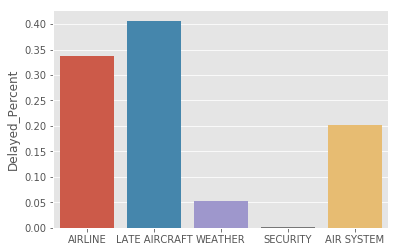

In [74]:
sns.barplot(summary_df.index, summary_df.Delayed_Percent)

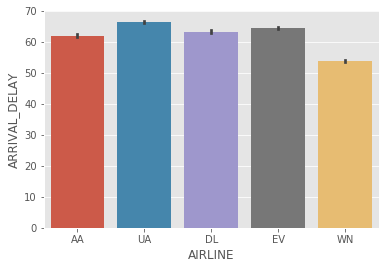

In [75]:
sns.barplot(flights_df.index, flights_df.ARRIVAL_DELAY)

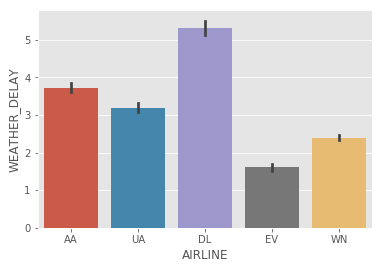

In [76]:
sns.barplot(flights_df.index, flights_df.WEATHER_DELAY)

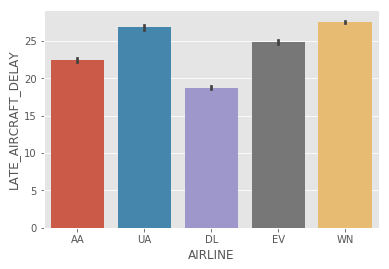

In [77]:
sns.barplot(flights_df.index, flights_df.LATE_AIRCRAFT_DELAY)